In [ ]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def getTs (P_tran, P_start):
    return (P_tran - P_start) / np.linalg.norm(P_tran - P_start)

def getTe (P_tran, P_end):
    return (P_end - P_tran) / np.linalg.norm(P_end - P_tran)

def bezier_5(u, p0, p1, p2, p3, p4, p5):
    t = 1 - u
    return (t**5)*p0 + 5*u*(t**4)*p1 + 10*(u*u)*(t**3)*p2 + 10*(u**3)*(t*t)*p3 + 5*(u**4)*t*p4 + (u**5)*p5


In [ ]:
def get_theta(P_start, P_trans, P_end):
    len_start_trans = np.linalg.norm(P_start - P_trans)
    len_trans_end = np.linalg.norm( P_trans - P_end)
    len_start_end = np.linalg.norm(P_start - P_end)
    print('a {} b {} c {}'.format(len_start_trans, len_trans_end, len_start_end))
    theta = np.arccos( ((len_start_trans**2 + len_trans_end**2 - len_start_end**2) / (2 * len_start_trans * len_trans_end)) )
    return theta


In [ ]:
def get_bezier_params(init_cornering_err, nu, theta, seg_len):
    cornering_fit_step = 0.001
    cornering_err = init_cornering_err
    Lt = seg_len
    d = 0
    c = 0
    
    i = 0
    while(Lt > seg_len/2.):
        d = (32 * cornering_err) / ((7*nu + 16) * np.sqrt(2+2*np.cos(theta)))
        c = (nu * 32 * cornering_err) / ((7*nu + 16) * np.sqrt(2+2*np.cos(theta)))
        Lt = 2*c + d
        if (Lt <= seg_len/2.):
            break
        i = i+1
        cornering_err = cornering_err - cornering_fit_step
    print('Result iteration={} e={}; segment length={}; Lt={};'.format(i, cornering_err, seg_len, Lt))
    return (cornering_err, d, c, Lt)


In [ ]:
def get_bezier_params2(cornering_err, nu, theta, seg_len):                                                    
                                                                                                              
    Lt0 = (2*nu + 1) * (32 * cornering_error) / ((7*nu + 16) * np.sqrt(2+2*np.cos(theta)))                    
    if (seg_len / 2 > Lt0):                                                                                   
        Lt = Lt0                                                                                              
    else:                                                                                                     
        Lt = seg_len / 2                                                                                      
        cornering_err = Lt * ((7*nu + 16) * np.sqrt(2+2*np.cos(theta))) / (32 * (2*nu + 1))                   
                                                                                                              
    d = (Lt / (2 * nu + 1))                                                                                   
    c = d * nu                                                                                                
                                                                                                              
    print('Result e={}; segment length={}; Lt={};'.format(cornering_err, seg_len, Lt))                        
    return (cornering_err, d, c, Lt) 


In [ ]:
# Generate points
N = 10
points = np.array([[0.,0.]], dtype=float)
for i in np.arange(1.0, N, 1.0):
    points = np.append(points, np.array( [[i, np.random.random_sample()]]), axis=0)
print(points)    

# calculate tangent vectors along linear segment
ts = np.empty((0,2), dtype=float)
te = np.empty((0,2), dtype=float)
for i in np.arange(1, points.shape[0]-1):
    ts = np.append(ts, np.array( [getTs(points[i], points[i-1])] ), axis=0)

for i in np.arange(1, points.shape[0]-1):
    te = np.append(te, np.array( [getTe(points[i], points[i+1])] ), axis=0)

print('TS-------')
print(ts)
print('TE--------')
print(te)

[[0.         0.        ]
 [1.         0.92764815]
 [2.         0.42754591]
 [3.         0.19057527]
 [4.         0.53993798]
 [5.         0.19781843]
 [6.         0.15905405]
 [7.         0.71750464]
 [8.         0.24549063]
 [9.         0.6118    ]]
TS-------
[[ 0.73313091  0.68008754]
 [ 0.89439061 -0.44728675]
 [ 0.97305223 -0.23058482]
 [ 0.94404579  0.3298144 ]
 [ 0.94615984 -0.32369978]
 [ 0.99924951 -0.03873529]
 [ 0.8730821   0.48757322]
 [ 0.90432134 -0.42685234]]
TE--------
[[ 0.89439061 -0.44728675]
 [ 0.97305223 -0.23058482]
 [ 0.94404579  0.3298144 ]
 [ 0.94615984 -0.32369978]
 [ 0.99924951 -0.03873529]
 [ 0.8730821   0.48757322]
 [ 0.90432134 -0.42685234]
 [ 0.93898471  0.34395889]]


In [ ]:
thetas = np.empty((0), dtype=float)
nu = np.empty((0), dtype=float)
seg_len = np.empty((0), dtype=float)

for i in np.arange(0, points.shape[0]-2):
    (p_start, p_trans, p_end) = points[i:i+3];
    print('start [{}]; trans [{}]; end [{}]'.format( p_start, p_trans, p_end ))
    ds = np.linalg.norm(p_start - p_trans)
    de = np.linalg.norm(p_trans - p_end)
    theta = get_theta(p_start, p_trans, p_end)
    seg_len = np.append(seg_len, np.array( [min(ds, de)] ), axis=0)
    print('ds {}; de {}; theta {}'.format(ds, de, theta))
    thetas = np.append(thetas, np.array( [theta] ), axis=0)
    nu = np.append(nu, np.array( [1/2.0769 * get_theta(p_start, p_trans, p_end) ** 0.9927 ] ), axis=0)
    
    
print('Thetas: {}'.format(thetas) )
print('Nu: {}'.format(nu))
print('Segments length: {}'.format(seg_len) )


start [[0. 0.]]; trans [[1.         0.92764815]]; end [[2.         0.42754591]]
a 1.3640128656969701 b 1.1180797153657798 c 2.045188379860727
ds 1.3640128656969701; de 1.1180797153657798; theta 1.9299812229022475
a 1.3640128656969701 b 1.1180797153657798 c 2.045188379860727
start [[1.         0.92764815]]; trans [[2.         0.42754591]]; end [[3.         0.19057527]]
a 1.1180797153657798 b 1.0276940632497615 c 2.131496291402435
ds 1.1180797153657798; de 1.0276940632497615; theta 2.910541909134385
a 1.1180797153657798 b 1.0276940632497615 c 2.131496291402435
start [[2.         0.42754591]]; trans [[3.         0.19057527]]; end [[4.         0.53993798]]
a 1.0276940632497615 b 1.0592706478295186 c 2.003155504820033
ds 1.0276940632497615; de 1.0592706478295186; theta 2.572807033035479
a 1.0276940632497615 b 1.0592706478295186 c 2.003155504820033
start [[3.         0.19057527]]; trans [[4.         0.53993798]]; end [[5.         0.19781843]]
a 1.0592706478295186 b 1.0569038682026715 c 2.000

In [ ]:
cornering_error = 0.2
es = np.empty((0), dtype=float)
ds = np.empty((0), dtype=float)
cs = np.empty((0), dtype=float)
Lts = np.empty((0), dtype=float)
for i in np.arange(0, seg_len.shape[0]):
    (e, d, c, Lt) = get_bezier_params2(cornering_error, nu[i], thetas[i], seg_len[i])
    es = np.append(es, np.array([e]), axis=0)
    ds = np.append(ds, np.array([d]), axis=0)
    cs = np.append(cs, np.array([c]), axis=0)
    Lts = np.append(Lts, np.array([Lt]), axis=0)

print('E: {}'.format(es))    
#ds = (32 * cornering_error) / ((7*nu + 16) * np.sqrt(2+2*np.cos(thetas)))
print('D: {}'.format(ds))
#cs = (nu * 32 * cornering_error) / ((7*nu + 16) * np.sqrt(2+2*np.cos(thetas)))
print('C: {}'.format(cs))
#Lts = 2*cs + ds
print('L: {}'.format(Lts))


Result e=0.1569082939611061; segment length=1.1180797153657798; Lt=0.5590398576828899;
Result e=0.02519514587296949; segment length=1.0276940632497615; Lt=0.5138470316248808;
Result e=0.06408629999922624; segment length=1.0276940632497615; Lt=0.5138470316248808;
Result e=0.0778220358590893; segment length=1.0569038682026715; Lt=0.5284519341013357;
Result e=0.03107717597229086; segment length=1.00075105664995; Lt=0.500375528324975;
Result e=0.06001686645649035; segment length=1.00075105664995; Lt=0.500375528324975;
Result e=0.11911523763689913; segment length=1.1058016191047355; Lt=0.5529008095523678;
Result e=0.09434531877510317; segment length=1.0649800694799596; Lt=0.5324900347399798;
E: [0.15690829 0.02519515 0.0640863  0.07782204 0.03107718 0.06001687
 0.11911524 0.09434532]
D: [0.19618036 0.13590235 0.14848869 0.1568828  0.13435653 0.143778
 0.17846501 0.16392388]
C: [0.18142975 0.18897234 0.18267917 0.18578457 0.1830095  0.17829876
 0.1872179  0.18428308]
L: [0.55903986 0.5138470

In [ ]:
P0 = np.empty((0,2), dtype=float)
P2 = np.empty((0,2), dtype=float)
P1 = np.empty((0,2), dtype=float)
P3 = np.empty((0,2), dtype=float)
P4 = np.empty((0,2), dtype=float)
P5 = np.empty((0,2), dtype=float)
for i in np.arange(0, Lts.shape[0]):
    p0 = points[i+1] - Lts[i] * ts[i]
    p5 = points[i+1] + Lts[i] * te[i]
    
    P0 = np.append(P0, [p0], axis=0 )
    P1 = np.append(P1, [p0 + cs[i]*ts[i]], axis=0)
    P2 = np.append(P2, [p0 + 2*cs[i]*ts[i]], axis=0)
    P3 = np.append(P3, [p5 - 2*cs[i]*te[i]], axis=0 )
    P4 = np.append(P4, [p5 - cs[i]*te[i]], axis=0)
    P5 = np.append(P5, [p5], axis=0 )
    
print('P0 {}'.format(P0))
print('P1 {}'.format(P1))
print('P2 {}'.format(P2))
print('P3 {}'.format(P3))
print('P4 {}'.format(P4))
print('P5 {}'.format(P5))  

P0 [[0.5901506  0.54745211]
 [1.54042004 0.65738288]
 [2.5        0.30906059]
 [3.50111717 0.36564692]
 [4.52656477 0.35978988]
 [5.5        0.17843624]
 [6.5172722  0.44792501]
 [7.5184579  0.47278525]]
P1 [[0.72316235 0.67084022]
 [1.70943513 0.57285806]
 [2.67775637 0.26693755]
 [3.67650631 0.42692135]
 [4.69972101 0.30054974]
 [5.67816495 0.17152978]
 [6.6807288  0.53920745]
 [7.68510902 0.39412359]]
P2 [[0.85617411 0.79422833]
 [1.87845021 0.48833324]
 [2.85551275 0.2248145 ]
 [3.85189545 0.48819577]
 [4.87287725 0.24130961]
 [5.8563299  0.16462333]
 [6.84418539 0.63048988]
 [7.85176014 0.31546192]]
P3 [[1.17546188 0.83989928]
 [2.13224009 0.3962089 ]
 [3.14018012 0.23954898]
 [4.14843621 0.48915505]
 [5.1342557  0.19261409]
 [6.12553    0.22915635]
 [7.16138972 0.64132643]
 [8.15392202 0.30187371]]
P4 [[1.33773094 0.75874816]
 [2.31612004 0.35263474]
 [3.31263763 0.2997992 ]
 [4.3242181  0.42901663]
 [5.31712785 0.18552517]
 [6.28119946 0.31609005]
 [7.33069486 0.56141203]
 [8.32

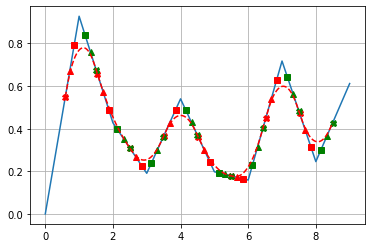

In [ ]:
B = np.empty((0,2), dtype=float)
for i in np.arange(0, P0.shape[0]):
    for u in np.arange(0, 1, 0.001):
        B = np.append(B, [bezier_5(u, P0[i], P1[i], P2[i], P3[i], P4[i], P5[i])], axis=0)

plt.plot(points[:, 0], points[:, 1], label='trajectory')
plt.plot(P0[:, 0], P0[:, 1], "rX", P1[:,0], P1[:, 1], "r^", P2[:, 0], P2[:, 1], "rs", P3[:, 0], P3[:, 1], "gs", P4[:, 0], P4[:, 1], "g^", P5[:, 0], P5[:, 1], "gX")
#plt.plot(P0[:, 0], P0[:, 1], "rX", P5[:, 0], P5[:, 1], "gX")
plt.plot(B[:, 0], B[:, 1], 'r--')

plt.grid()
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)

plt.show()
